In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")


In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\DS_Project\New folder\Mall_Customers set.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


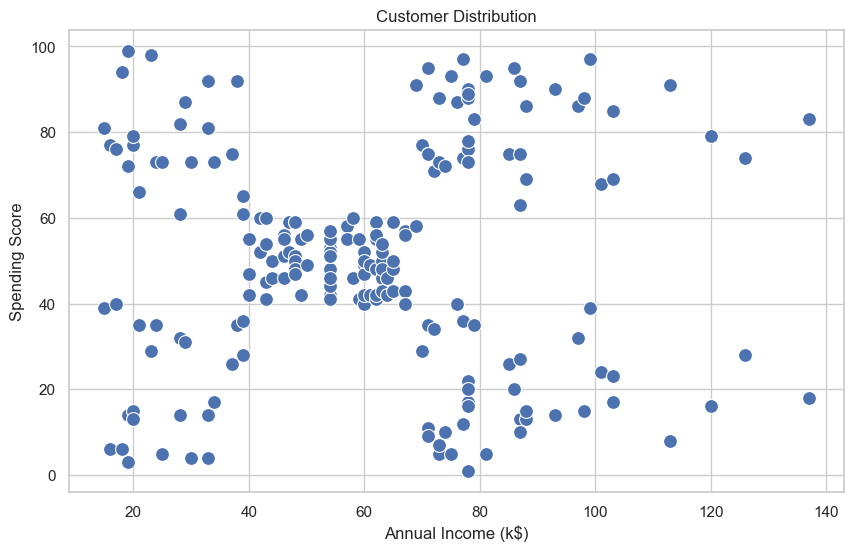

In [8]:
# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', s=100)
plt.title("Customer Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

<Figure size 1500x800 with 0 Axes>

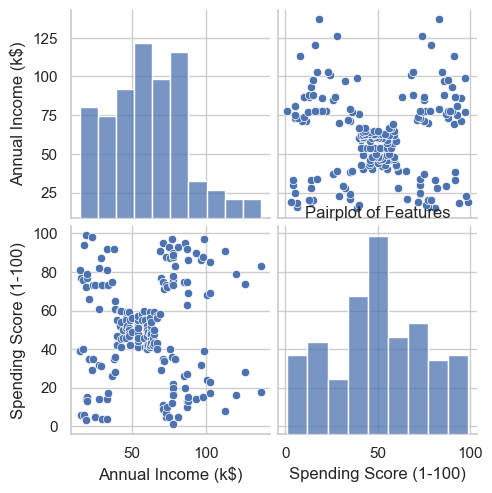

In [33]:
# Pairplot to visualize data distribution
plt.figure(figsize=(15,8))
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Pairplot of Features")
plt.show()

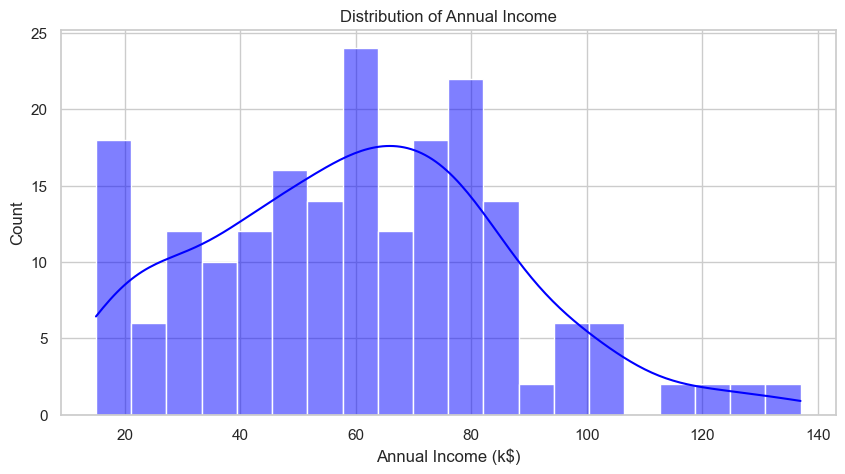

In [35]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.show()

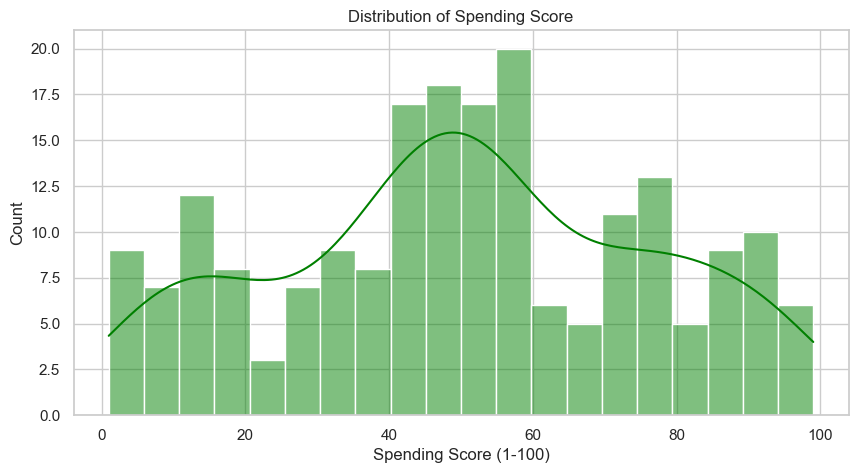

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.show()

In [9]:
# Dropping CustomerID column
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify standardized data
print("\nStandardized Data:")
print(X_scaled[:5])



Standardized Data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [ ]:
# K-means 

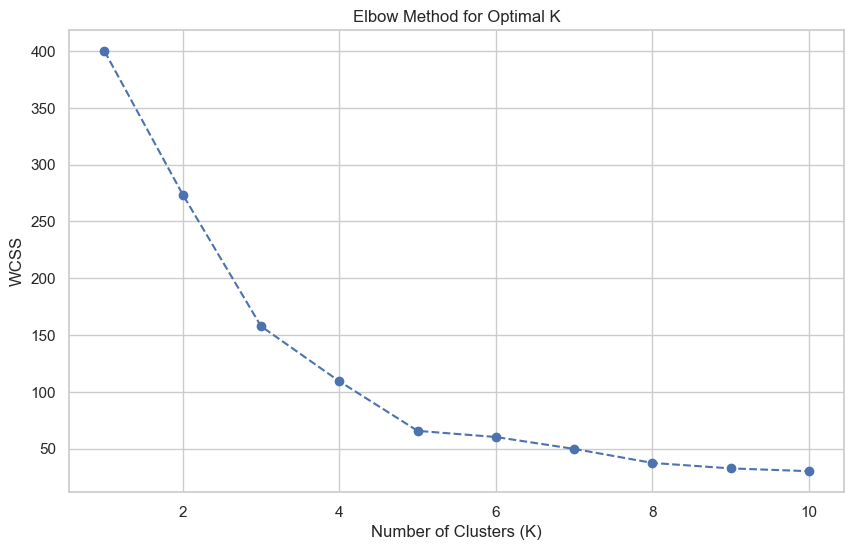

In [10]:
# Elbow method to determine optimal K
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia measures WCSS

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Implement K-Means with Optimal K

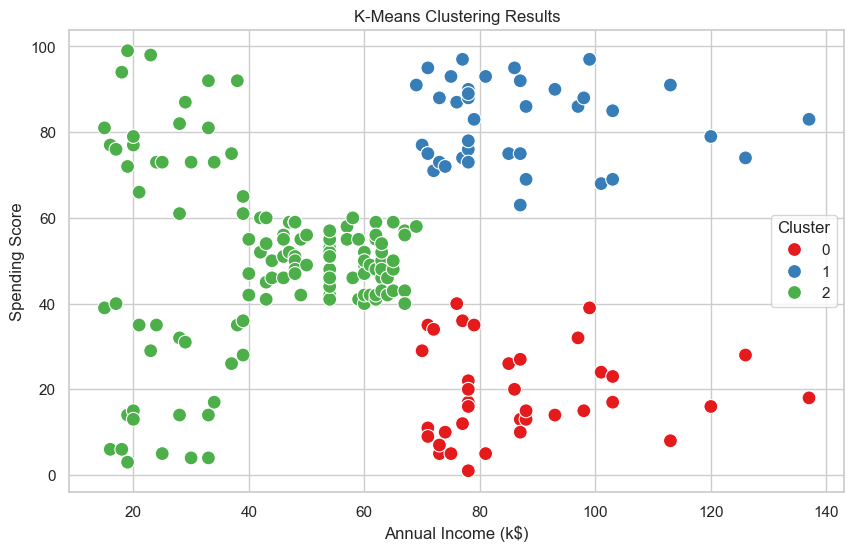

In [12]:
# Assume K=3 based on the elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster',
                data=data, palette='Set1', s=100)
plt.title("K-Means Clustering Results")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Hierarchical Clustering

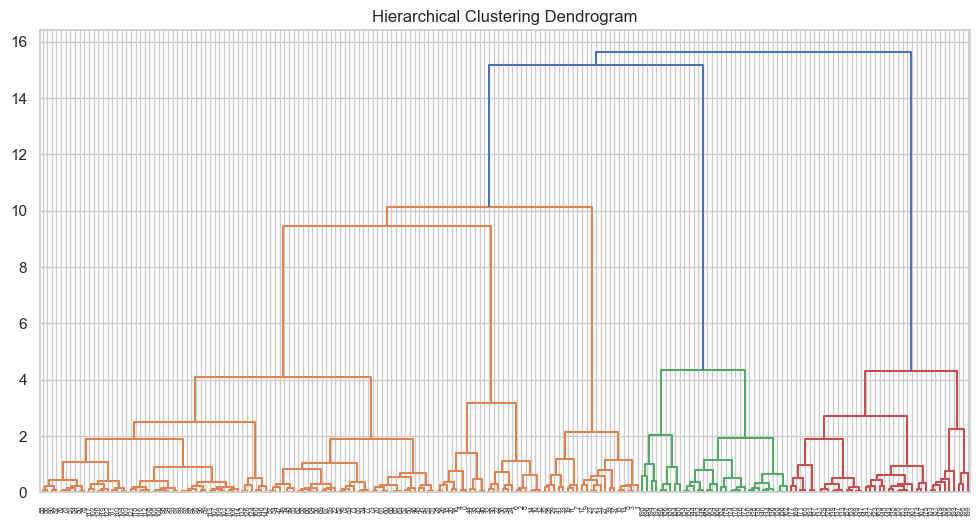

In [13]:
# Create Dendrogram
# Hierarchical clustering - Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


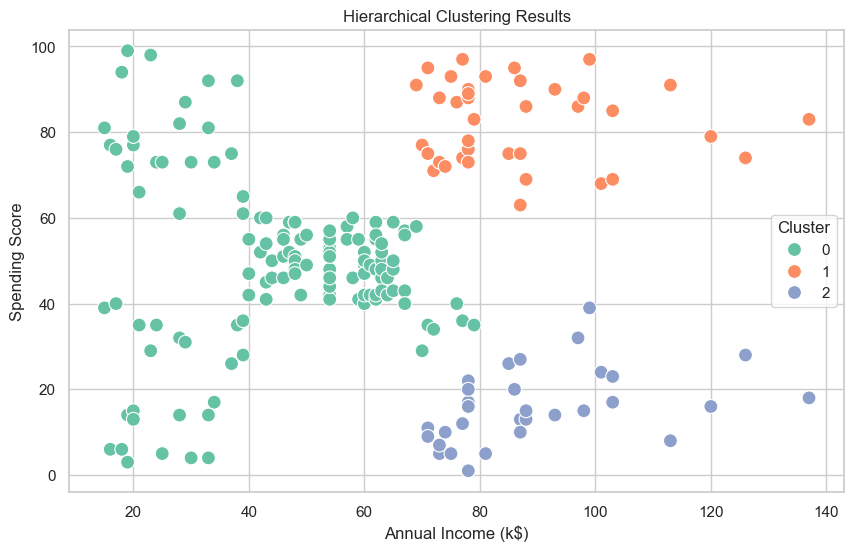

In [17]:
# Implement Agglomerative Clustering
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Agg_Cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualize Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster',
                data=data, palette='Set2', s=100)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Dimensionality Reduction using PCA

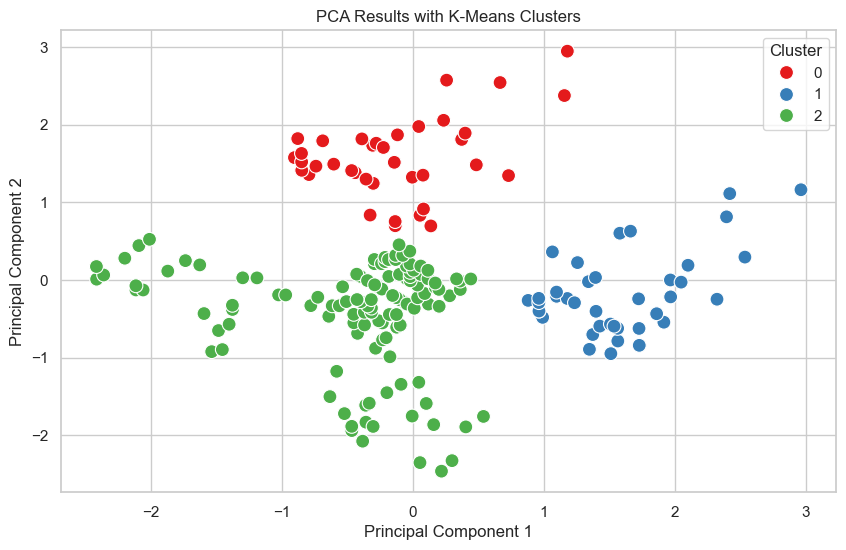

In [18]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataset
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Visualize PCA components with K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=data, palette='Set1', s=100)
plt.title("PCA Results with K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

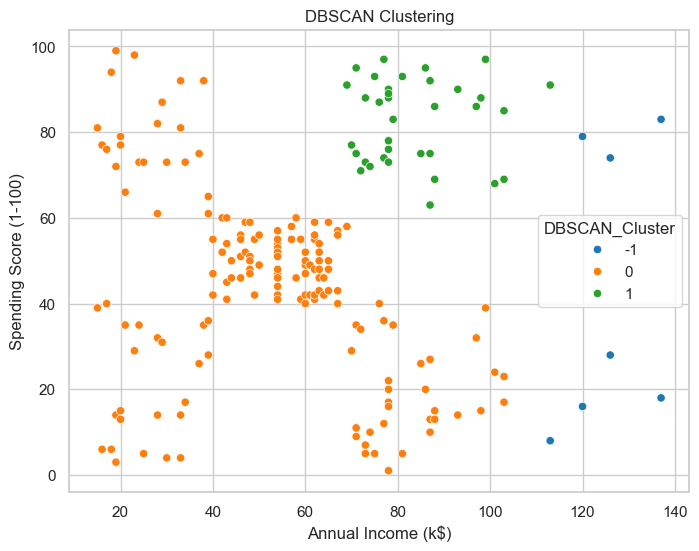

In [26]:
# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [28]:
print(f"Silhouette Score (KMeans): {silhouette_score(X_scaled, data['KMeans_Cluster'])}")
print(f"Silhouette Score (DBSCAN): {silhouette_score(X_scaled, data['DBSCAN_Cluster'])}")
print(f"Silhouette Score (Agglomerative): {silhouette_score(X_scaled, data['Agg_Cluster'])}")

Silhouette Score (KMeans): 0.46658474419000145
Silhouette Score (DBSCAN): 0.3566017629129311
Silhouette Score (Agglomerative): 0.4610481446570447


In [42]:
from sklearn.metrics import silhouette_score

# Final Cluster Counts
print("\nK-Means Cluster Counts:")
print(data['KMeans_Cluster'].value_counts())

print("\nAgglomerative Cluster Counts:")
print(data['Agg_Cluster'].value_counts())

print("\nDBSCAN Cluster Counts:")
print(data['DBSCAN_Cluster'].value_counts())




K-Means Cluster Counts:
KMeans_Cluster
2    123
1     39
0     38
Name: count, dtype: int64

Agglomerative Cluster Counts:
Agg_Cluster
0    129
1     39
2     32
Name: count, dtype: int64

DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    157
 1     36
-1      7
Name: count, dtype: int64


In [43]:
# Display the first few rows of the DataFrame
print("\nFinal DataFrame with Clusters:")
print(data.head())


Final DataFrame with Clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Cluster  Agg_Cluster      PCA1      PCA2  DBSCAN_Cluster  
0               2            0 -1.537109 -0.922207               0  
1               2            0 -0.384168 -2.075149               0  
2               2            0 -2.416002  0.010665               0  
3               2            0 -0.466982 -1.938355               0  
4               2            0 -1.455678 -0.895678               0  


In [44]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Agg_Cluster,PCA1,PCA2,DBSCAN_Cluster
0,1,Male,19,15,39,2,0,-1.537109,-0.922207,0
1,2,Male,21,15,81,2,0,-0.384168,-2.075149,0
2,3,Female,20,16,6,2,0,-2.416002,0.010665,0
3,4,Female,23,16,77,2,0,-0.466982,-1.938355,0
4,5,Female,31,17,40,2,0,-1.455678,-0.895678,0


In [46]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import joblib  # For saving models

# Load the dataset
data = pd.read_csv(r"C:\Users\DELL\Desktop\DS_Project\New folder\Mall_Customers set.csv")  # Replace with your dataset path

# Select relevant features for clustering
features = ["Annual Income (k$)", "Spending Score (1-100)"]  # Replace with actual features
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Train Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clustering.fit(X_scaled)

# Train DBSCAN Model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Save models and scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(agg_clustering, "agg_clustering.pkl")
joblib.dump(dbscan, "dbscan_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("All models and scaler have been saved successfully.")


All models and scaler have been saved successfully.
